In [16]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#loda dataset
df = sns.load_dataset("titanic")
#display first 5 rows
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [17]:
#model import
from sklearn.cluster import KMeans
#normalization
from sklearn.preprocessing import StandardScaler

X = df[["age", "fare"]].dropna()
#standardization
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(X)

In [18]:
X.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [19]:
X_scaled

array([[-0.53037664, -0.51897787],
       [ 0.57183099,  0.69189675],
       [-0.25482473, -0.50621356],
       ...,
       [-0.73704057, -0.08877362],
       [-0.25482473, -0.08877362],
       [ 0.15850313, -0.50952283]])

In [20]:
#check null values
X.isnull().sum()

age     0
fare    0
dtype: int64

In [21]:
#perform k-means clustering
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(X_scaled)
#assign cluster labels
X['cluster'] = kmeans_model.labels_

In [22]:
#how to plot age and fare
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


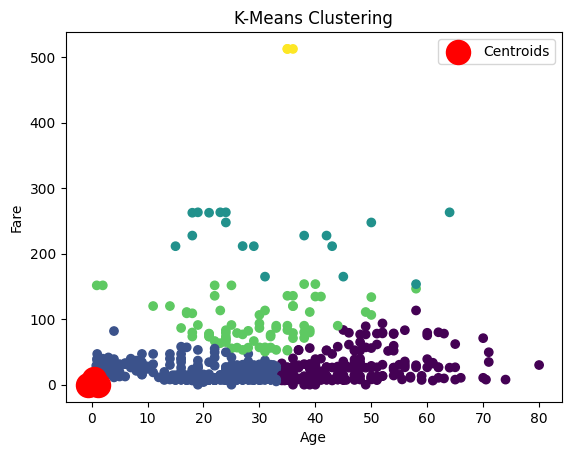

In [23]:
plt.scatter(X['age'], X['fare'], c=X['cluster'], cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [24]:
import plotly.express as px
fig = px.scatter(X, x='age', y='fare', color='cluster', title='K-Means Clustering with Plotly')
fig.show()

In [25]:
#3D plot
import plotly.express as px
fig = px.scatter_3d(X, x='age', y='fare', z='cluster', color='cluster', title='3D K-Means Clustering')
fig.show()

In [28]:
#How to saving the model
#define model
import joblib
model = joblib.dump(kmeans_model, 'model.job.lib')
print("Model saved successfully!",model)

Model saved successfully! ['model.job.lib']


In [30]:
#how to load the model
loaded_model = joblib.load('model.job.lib')
print("Model loaded successfully!", loaded_model)

Model loaded successfully! KMeans(n_clusters=5)


In [46]:
#DecisionTreeClassifier
import seaborn as sns
df_1 = sns.load_dataset("tips")
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [48]:
X = df_1.drop(columns=["sex"])
y = df_1["sex"]
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [49]:
y.head()


0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [50]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#train the model
model.fit(X,y)

ValueError: could not convert string to float: 'No'

In [51]:
#preprocessing model
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
# encoding categorical data
le.fit(df_1["smoker"])     
df_1["smoker"] = le.transform(df_1["smoker"])
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


In [52]:
#preorocessing model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encoding categorical data
le.fit(df_1['day'])
df_1['day'] = le.transform(df_1['day'])
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,Dinner,2
1,10.34,1.66,Male,0,2,Dinner,3
2,21.01,3.50,Male,0,2,Dinner,3
3,23.68,3.31,Male,0,2,Dinner,2
4,24.59,3.61,Female,0,2,Dinner,4


In [53]:
#preorocessing model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encoding categorical data
le.fit(df_1['time'])
df_1['time'] = le.transform(df_1['time'])
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4


In [55]:
X = df_1.drop(columns=["sex"])
y = df_1["sex"]
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [56]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#train the model
model.fit(X,y)

DecisionTreeClassifier()

In [58]:
#save the model
joblib.dump(model, 'decision_tree_model.job.lib')
print("Model saved successfully!")

Model saved successfully!


In [59]:
#load the model
joblib.load('decision_tree_model.job.lib')
print("Model loaded successfully!", loaded_model)

Model loaded successfully! KMeans(n_clusters=5)


In [60]:
import pickle as pkl
#save the model using pickle
with open('model.pkl', 'wb') as f:
    pkl.dump(model, f)
#load the model using pickle
with open('model.pkl', 'rb') as f:
    loaded_model = pkl.load(f)